# Retrieve blockgroup shapefiles

In [27]:
import geopandas as gpd
import urllib.request
import zipfile
import os

# Set the download URL, file name and folder path
url = "https://www2.census.gov/geo/tiger/TIGER2019/BG/tl_2019_36_bg.zip"
filename = "tl_2019_36_bg.zip"
folder_path = "./data/ny_blockgroup_shapefile"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

# Check if the shapefile exists, otherwise download and unzip it
if not os.path.exists(os.path.join(folder_path, "tl_2019_36_bg.shp")):
    # Download and unzip the shapefile
    urllib.request.urlretrieve(url, os.path.join(folder_path, filename))
    with zipfile.ZipFile(os.path.join(folder_path, filename), 'r') as zip_ref:
        zip_ref.extractall(folder_path)

# Read the shapefile into a geopandas GeoDataFrame
gdf = gpd.read_file(os.path.join(folder_path, "tl_2019_36_bg.shp"))

# Convert to a pandas DataFrame
df = gdf.drop(columns='geometry')

In [7]:
df

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,36,015,010200,1,360150102001,Block Group 1,G5030,S,41906395,22057,+42.2623602,-076.8963844
1,36,063,024303,2,360630243032,Block Group 2,G5030,S,34153627,0,+43.1926587,-078.7897012
2,36,007,014301,2,360070143012,Block Group 2,G5030,S,4859207,978257,+42.1056684,-075.9854403
3,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386
4,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669
...,...,...,...,...,...,...,...,...,...,...,...,...
15458,36,119,005001,2,361190050012,Block Group 2,G5030,S,481823,0,+40.9809055,-073.8064195
15459,36,119,005100,3,361190051003,Block Group 3,G5030,S,244634,0,+40.9574741,-073.8089437
15460,36,119,005300,2,361190053002,Block Group 2,G5030,S,364352,11715,+40.9152303,-073.8101624
15461,36,119,006200,4,361190062004,Block Group 4,G5030,S,138867,0,+40.9089470,-073.7985799


In [16]:
gdf

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,015,010200,1,360150102001,Block Group 1,G5030,S,41906395,22057,+42.2623602,-076.8963844,"POLYGON ((-76.96544 42.26472, -76.96544 42.264..."
1,36,063,024303,2,360630243032,Block Group 2,G5030,S,34153627,0,+43.1926587,-078.7897012,"POLYGON ((-78.82575 43.20439, -78.82575 43.208..."
2,36,007,014301,2,360070143012,Block Group 2,G5030,S,4859207,978257,+42.1056684,-075.9854403,"POLYGON ((-76.01756 42.09848, -76.01749 42.098..."
3,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747..."
4,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15458,36,119,005001,2,361190050012,Block Group 2,G5030,S,481823,0,+40.9809055,-073.8064195,"POLYGON ((-73.81177 40.97971, -73.81156 40.980..."
15459,36,119,005100,3,361190051003,Block Group 3,G5030,S,244634,0,+40.9574741,-073.8089437,"POLYGON ((-73.81377 40.95590, -73.81362 40.956..."
15460,36,119,005300,2,361190053002,Block Group 2,G5030,S,364352,11715,+40.9152303,-073.8101624,"POLYGON ((-73.81385 40.91234, -73.81351 40.913..."
15461,36,119,006200,4,361190062004,Block Group 4,G5030,S,138867,0,+40.9089470,-073.7985799,"POLYGON ((-73.80188 40.91177, -73.80137 40.911..."


In [25]:
# '085' for Staten Island is removed for its lack of GTFS files
nyc_counties_fp = ['005', '047', '061', '081'] # FIPS codes for New York City counties
nyc_gdf = gdf[gdf['COUNTYFP'].isin(nyc_counties_fp)]

<AxesSubplot: >

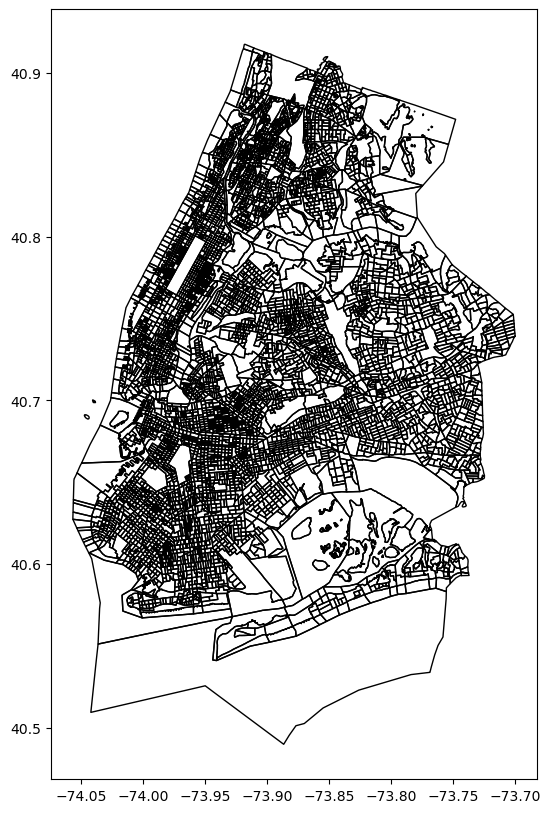

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
nyc_gdf.plot(ax=ax, edgecolor='black', color='none')

# GTFS File Results

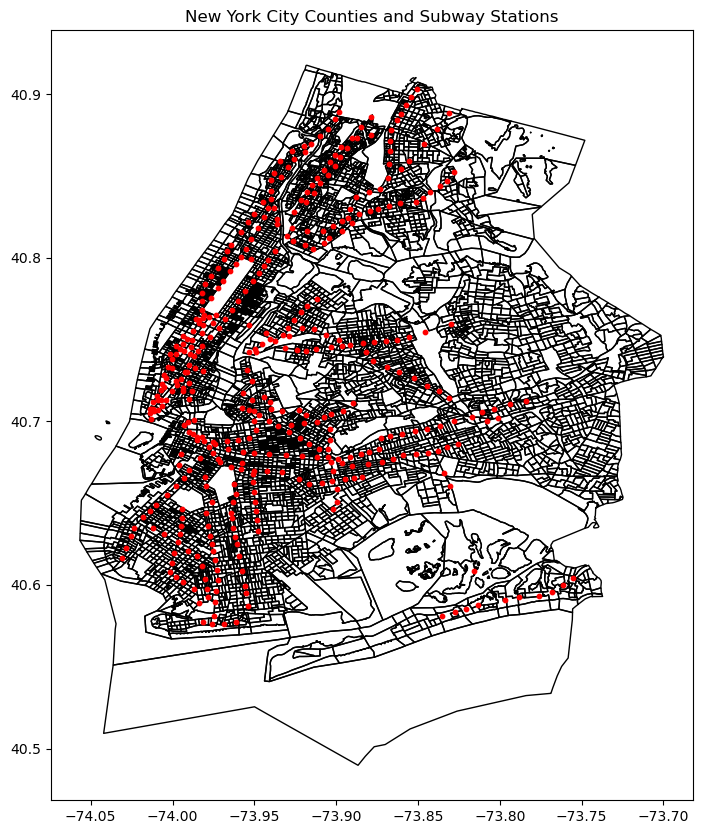

In [31]:
import pandas as pd

# Read the stations_to_coordinates.csv file into a pandas DataFrame
stations_df = pd.read_csv("./data/networkx_analysis_results/stations_to_coordinates.csv")

# Convert the stations DataFrame to a geopandas GeoDataFrame
stations_gdf = gpd.GeoDataFrame(
    stations_df, 
    geometry=gpd.points_from_xy(stations_df.stop_lon, stations_df.stop_lat)
)

# Create a map of New York City counties and overlay the station locations
fig, ax = plt.subplots(figsize=(10, 10))
nyc_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
stations_gdf.plot(ax=ax, color='red', markersize=10)
ax.set_title('New York City Counties and Subway Stations')
plt.show()